In [1]:
using Plots
using CSV
using DataFrames
using Turing
using Distributions
using DifferentialEquations
using StatsPlots
using MCMCChains
using DiffEqSensitivity

In [2]:
lynxhare_df = CSV.read("lynxhare.csv")

,Year,Hare,Lynx
,Int64,Float64,Float64
1,1845,19.58,30.09
2,1846,19.6,45.15
3,1847,19.61,49.15
4,1848,11.99,39.52
5,1849,28.04,21.23
6,1850,58.0,8.42
7,1851,74.6,5.56
8,1852,75.09,5.08
9,1853,88.48,10.17


In [3]:
lynxhare = Matrix(hcat(lynxhare_df[2][50: end], lynxhare_df[3][50: end])')

2×42 Array{Float64,2}:
 70.4  85.81  56.69  16.59   6.16  2.3   …  19.52  82.11  89.76  81.66  15.76
 46.0  51.41  46.43  33.68  18.01  8.86      8.31  16.01  24.82  29.7   35.4

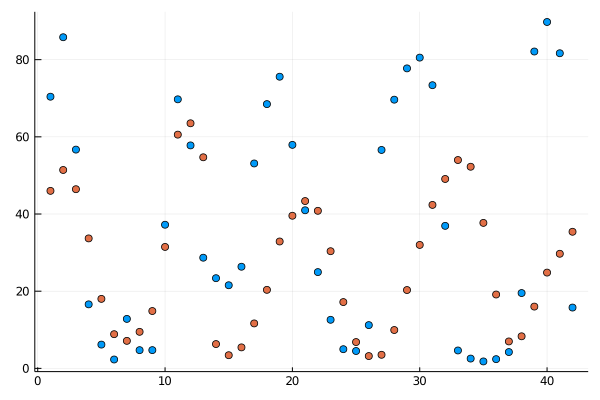

In [26]:
scatter(1:42, lynxhare[1, :],legend=false)
scatter!(1:42, lynxhare[2, :],legend=false)

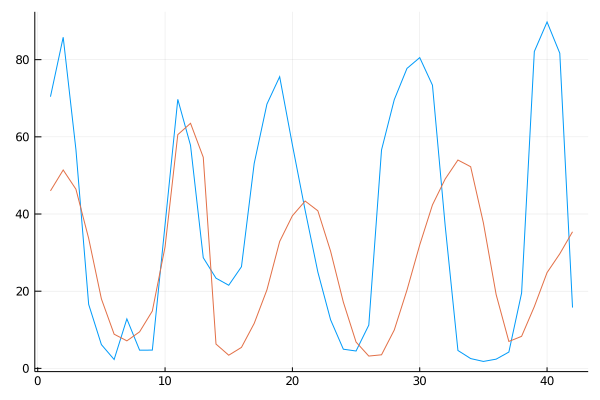

In [28]:
plot(1:42, lynxhare[1, :],legend=false)
plot!(1:42, lynxhare[2, :],legend=false)


In [24]:
function lotka_volterra(du,u,p,t)
  x, y = u
  α, β, δ, γ = p
  du[1] = dx = (α - β*y)x
  du[2] = dy = (δ*x - γ)y
end;

In [22]:
u_init = [70,46];

In [31]:
@model function fitlv(data)
    σ ~ InverseGamma(2, 3)
    α ~ truncated(Normal(2,1),0,4)
    β ~ truncated(Normal(2,1),0,4)
    γ ~ truncated(Normal(2,1),0,4)
    δ ~ truncated(Normal(2,1),0,4)

    k = [α,β,δ,γ]
    prob = ODEProblem(lotka_volterra,u_init,(0.0,41.0),k)
    predicted = solve(prob,Tsit5(),saveat=1)

    for i = 1:length(predicted)
        data[:,i] ~ MvNormal(predicted[i], σ)
    end
end;

In [30]:
model = fitlv(lynxhare);

In [32]:
chain = sample(model, NUTS(.6),1000)

┌ Warning: Interrupted. Larger maxiters is needed.
└ @ DiffEqBase /Users/lambda/.julia/packages/DiffEqBase/V7P18/src/integrator_interface.jl:329
┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq /Users/lambda/.julia/packages/OrdinaryDiffEq/VPJBD/src/solve.jl:459
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ DiffEqBase /Users/lambda/.julia/packages/DiffEqBase/V7P18/src/integrator_interface.jl:323
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/lambda/.julia/packages/AdvancedHMC/QB368/src/hamiltonian.jl:47
┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq /Users/lambda/.julia/packages/OrdinaryDiffEq/VPJBD/src/solve.jl:459
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this 

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/lambda/.julia/packages/AdvancedHMC/QB368/src/hamiltonian.jl:47
┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq /Users/lambda/.julia/packages/OrdinaryDiffEq/VPJBD/src/solve.jl:459
┌ Warning: NaN dt detected. Likely a NaN value in the state, parameters, or derivative value caused this outcome.
└ @ DiffEqBase /Users/lambda/.julia/packages/DiffEqBase/V7P18/src/integrator_interface.jl:323
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/lambda/.julia/packages/AdvancedHMC/QB368/src/hamiltonian.jl:47
┌ Warning: Automatic dt set the starting dt as NaN, causing instability.
└ @ OrdinaryDiffEq /Users/lambda/.julia/packages/OrdinaryDiffEq/VPJBD/src/solve.jl:459
┌ Warning: NaN dt detected. 

Chains MCMC chain (500×17×1 Array{Float64,3}):

Iterations        = 1:500
Thinning interval = 1
Chains            = 1
Samples per chain = 500
parameters        = α, β, γ, δ, σ
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, max_hamiltonian_energy_error, n_steps, nom_step_size, numerical_error, step_size, tree_depth

Summary Statistics
  parameters      mean       std   naive_se      mcse       ess      rhat  
      Symbol   Float64   Float64    Float64   Float64   Float64   Float64  
                                                                           
           α    1.1158    0.0000     0.0000    0.0000    1.5950    1.6957  
           β    1.1167    0.0000     0.0000    0.0000    8.4567    1.0713  
           γ    3.4438    0.0000     0.0000    0.0000    2.9147    1.3025  
           δ    0.6094    0.0000     0.0000    0.0000    2.4408    1.3747  
           σ    0.5007    0.0000     0.0000    0.0000    1.5591    1

In [ ]:
plot(chain)